In [1]:
# travail à faire :
# 1 - Histogramme matlab avec code python (matlab imhist)
# 2 - Binariation d'une image avec code python (matlab im2bw)
# 3 - detection des objets dans une image (imclearborder, bwareaopen, imcomplement, imfill, imopen, imclose, imerode, imdilate, strel)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# affichage de l'histogramme d'une image
def imhist(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    # afficher l'histogramme en bar chart
    plt.bar(np.arange(256), hist[:, 0], color='b', width=1)
    return hist

# binarisation d'une image
def im2bw(img, threshold):
    # detection automatique du seuil
    if threshold == -1:
        threshold, _ = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return img

def imfill(img):
    assert len(img.shape) == 2, "L'image doit être en niveaux de gris"
    im_floodfill = img.copy()
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    # Utilisation de 255 pour le remplissage pour correspondre aux images binaires
    cv2.floodFill(im_floodfill, mask, (0,0), 255)
    
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)
    img_filled = img | im_floodfill_inv
    
    return img_filled

def imclearborder(img):
    img = cv2.bitwise_not(img)
    filled_img = imfill(img)
    img_cleared = cv2.bitwise_not(cv2.bitwise_and(img, cv2.bitwise_not(filled_img)))
    return img_cleared


def bwareaopen(img, size):
    output = cv2.connectedComponentsWithStats(img, 4, cv2.CV_32S)
    num_labels = output[0]
    labels = output[1]
    stats = output[2]
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] < size:
            img[labels == i] = 0
    return img

In [2]:
# lecture de l'image avec imread
img = cv2.imread('images/lena.jpg')

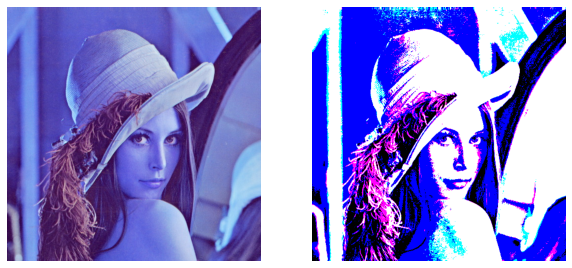

In [3]:
# afficher l'image reelle en NG et à droite l'image binarisée
def show(img, img_bw):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].axis('off')
    ax[1].imshow(img_bw, cmap='gray')
    ax[1].axis('off')
    plt.show()
img_binari = im2bw(img, 100)
show(img, img_binari)   


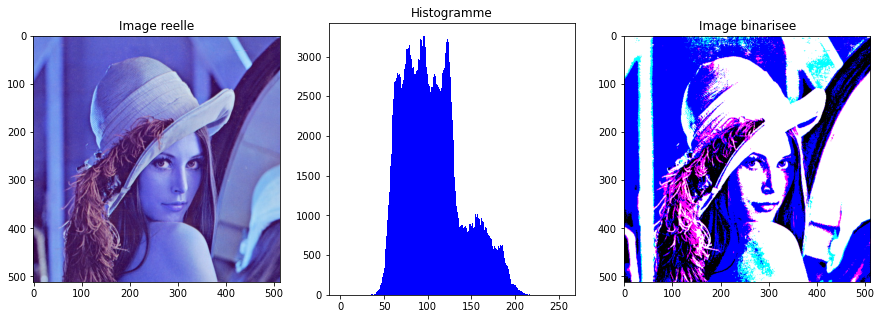

In [4]:
# afficher l'histogramme de l'image
# afficher l'image reelle, hisotgramme et l'image binarisee
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Image reelle')
plt.subplot(132)
hist = imhist(img)
plt.title('Histogramme')
plt.subplot(133)
plt.imshow(img_binari, cmap='gray')
plt.title('Image binarisee')
plt.show()

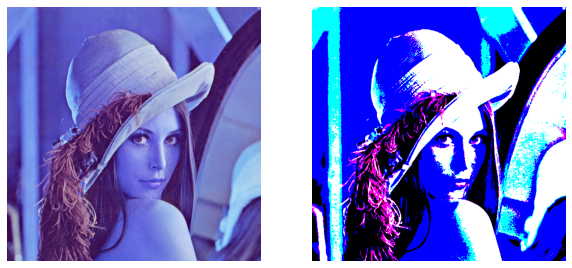

In [5]:
# binarisation de l'image avec l'entre input de l'user
threshold = int(input('Enter la seuil de binarisation: '))
img_binari = im2bw(img, threshold)
show(img, img_binari)


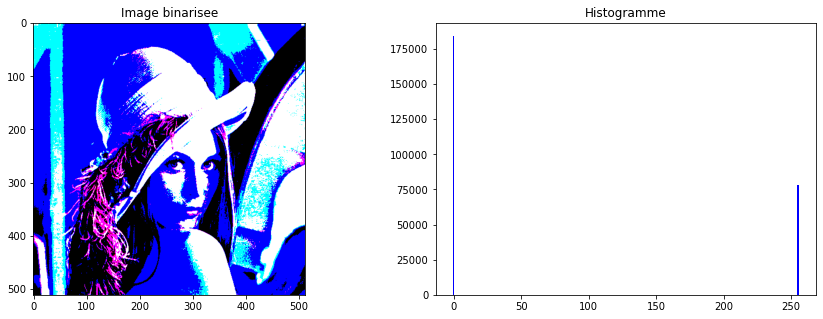

In [6]:
# affichage de l'historamme de l'image binarisée
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img_binari)
plt.title('Image binarisee')
plt.subplot(122)
hist = imhist(img_binari)
plt.title('Histogramme')
plt.show()


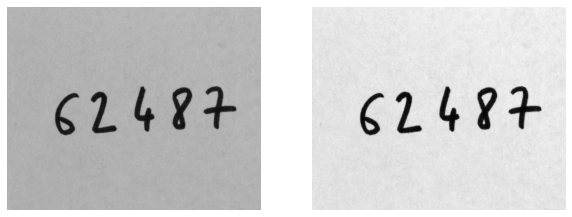

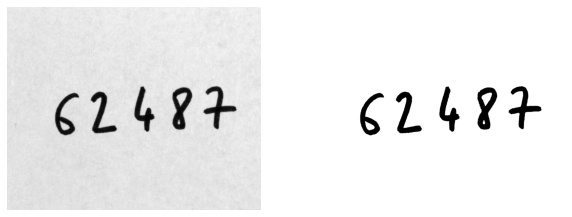

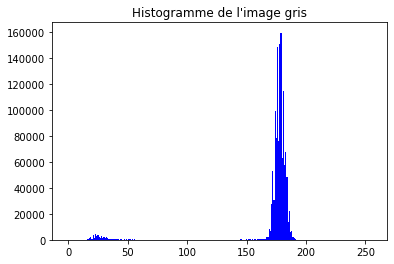

In [7]:
# binarisation de l'image et on attribue les pixels blancs (255 ou 1) à la forme de l'objet présent dans l'image binaire (avant-plan) et les pixels noirs (égal à 0) au fond (arrière-plan)
# d'ouvrir et afficher une image de la séquence
img = cv2.imread('images/image.tif')

#  convertion de l'img en greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img, gray)

# transformation de l'image couleur acquise en image monochrome si nécessaire
_, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(gray, img_bin)

# calculer et afficher l'histogramme de l'image gris
plt.figure()
hist = imhist(gray)
plt.title('Histogramme de l\'image gris')
plt.show()


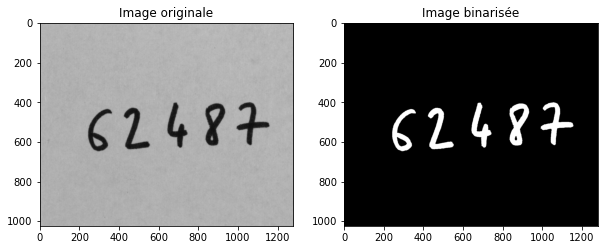

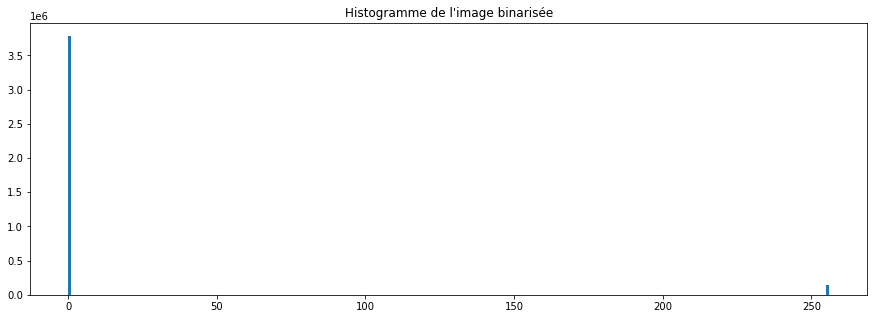

In [13]:
# binarisation de l'image et on attribue les pixels blancs (255 ou 1) à la forme de l'objet présent dans l'image binaire (avant-plan) et les pixels noirs (égal à 0) au fond (arrière-plan)
# d'ouvrir et afficher une image de la séquence

# Fonction pour binariser l'image
def im2bw(image, threshold):
    return (image > threshold) * 255

# transformation de l'image couleur acquise en image monochrome si nécessaire
# binarisation de l'image
img_binari = im2bw(img, 100)

# Affichage de l'image originale et de l'image binarisée
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Image originale')

plt.subplot(122)
plt.imshow(img_binari, cmap='gray')
plt.title('Image binarisée')
plt.show()

# calculer et afficher l'histogramme de l'image monochrome
plt.figure(figsize=(15, 5))
plt.hist(img_binari.ravel(), bins=256, range=[0,256])
plt.title('Histogramme de l\'image binarisée')
plt.show()


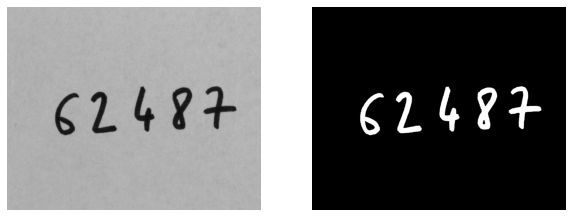

In [9]:
# binarisation de l'image grise en sorte à obtenir les chiffres en blanc et le fond en noir
def im2bwblackwhite(img, threshold):
    img_bin = np.zeros_like(img)
    img_bin[img < threshold] = 255

    return img_bin

# binarisation de l'image
img_blachandwith = im2bwblackwhite(gray, 100)

show(img, img_blachandwith)


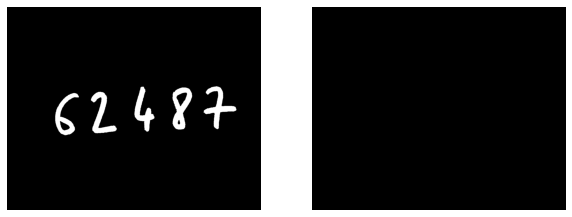

In [10]:
# 3 - detection des objets dans une image (imclearborder, bwareaopen, imcomplement, imfill, imopen, imclose, imerode, imdilate, strel)

# utilisation de imclearborder pour supprimer les objets connectés aux bords de l'image
img_clear = imclearborder(gray)
show(img_blachandwith, img_clear)

Text(0.5, 1.0, 'Image après binarisation en blanc et noir')

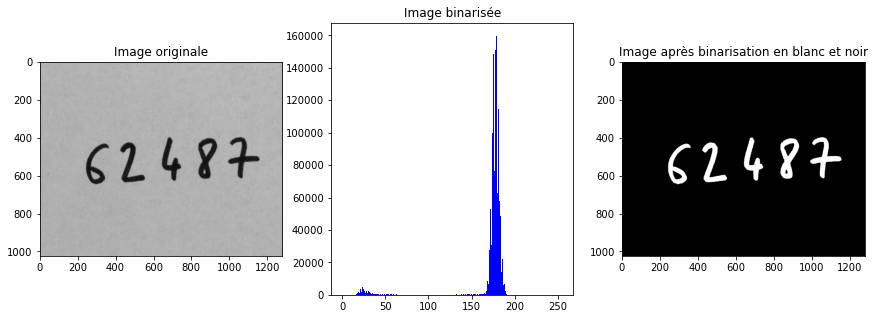

In [11]:
plt.figure(figsize=(20, 5))  
plt.subplot(141)  
plt.imshow(img, cmap='gray')
plt.title('Image originale')


plt.subplot(142)  
hist = imhist(gray)
plt.title('Image binarisée')

plt.subplot(143)  
plt.imshow(img_blachandwith, cmap='gray')
plt.title('Image après binarisation en blanc et noir')


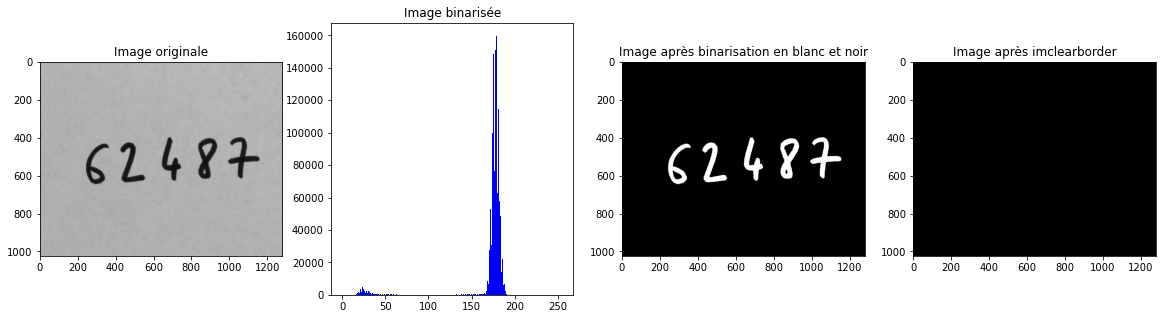

In [12]:
plt.figure(figsize=(20, 5))  
plt.subplot(141)  
plt.imshow(img, cmap='gray')
plt.title('Image originale')


plt.subplot(142)  
hist = imhist(gray)
plt.title('Image binarisée')

plt.subplot(143)  
plt.imshow(img_blachandwith, cmap='gray')
plt.title('Image après binarisation en blanc et noir')

plt.subplot(144)  
plt.imshow(img_clear, cmap='gray')  
plt.title('Image après imclearborder')

plt.show()